In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import numpy as np

# 2013-2023 Decade Analysis

<div class="alert alert-block alert-warning">
In this notebook, we will be loooking at data containing species of the 6th mass extinction from 2013 through 2023. <br><br>
<b>Explanation:</b> We chose to do 2013-2023 because data from 2025 and 2024 could be incomplete so relying on earlier data makes the data more accurate for interpretation.
</div>

## YEARS LISTINGS

In [64]:
# importing years
data_2023 = pd.read_csv('CSVS/2023.csv')
data_2022 = pd.read_csv('CSVS/2022.csv')
data_2021 = pd.read_csv('CSVS/2021.csv')
data_2020 = pd.read_csv('CSVS/2020.csv')
data_2019 = pd.read_csv('CSVS/2019.csv')
data_2018 = pd.read_csv('CSVS/2018.csv')
data_2017 = pd.read_csv('CSVS/2017.csv')
data_2016 = pd.read_csv('CSVS/2016.csv')
data_2015 = pd.read_csv('CSVS/2015.csv')
data_2014 = pd.read_csv('CSVS/2014.csv')
data_2013 = pd.read_csv('CSVS/2013.csv')

In [65]:
# clean function for table 

def clean(table):
    table['Group'] = table['Group'].str.replace(r'<.*?>', '', regex=True) #removing <div> from group column cells
    table["Initial Listing Date"] = pd.to_datetime(table["Initial Listing Date"]) #converting Intial listing Date to a standard time
    table["Year"] = table["Initial Listing Date"].dt.year
    table.rename(columns={"Current\nESA Listing Status  ": "Current ESA Listing Status"}, inplace=True) #rename
    cleaned = table
    
    return cleaned

In [66]:
# APPLY CLEAN FUNCTION
df_2023 = clean(data_2023)
df_2022 = clean(data_2022)
df_2021 = clean(data_2021)
df_2020 = clean(data_2020)
df_2019 = clean(data_2019)
df_2018 = clean(data_2018)
df_2017 = clean(data_2017)
df_2016 = clean(data_2016)
df_2015 = clean(data_2015)
df_2014 = clean(data_2014)
df_2013 = clean(data_2013)

<div class="alert alert-block alert-warning">
MERGE DATA
</div>

In [67]:
df_list = [df_2023,df_2022,df_2021,df_2020,df_2019,df_2018,df_2017,df_2016,df_2015,df_2014,df_2013] #put tables into list
df_joined = pd.concat(df_list, axis=0, ignore_index=True) #Concatonate the tables to make one big one

df_joined

,Lead Agency,Scientific Name,Common Name,Current ESA Listing Status,Initial Listing Date,Group,Year
0,FWS,Glaucidium brasilianum cactorum,"Pygmy-owl, cactus ferruginous (Wherever found)",Threatened,2023-08-21,Birds,2023
1,FWS,Tympanuchus pallidicinctus,"Prairie-chicken, lesser (Northern DPS)",Threatened,2023-03-27,Birds,2023
2,FWS,Tympanuchus pallidicinctus,"Prairie-chicken, lesser (Southern DPS)",Endangered,2023-03-27,Birds,2023
3,FWS,Rana boylii,"Frog, foothill yellow-legged (Central Coast Di...",Threatened,2023-09-28,Amphibians,2023
4,FWS,Rana boylii,"Frog, foothill yellow-legged (South Coast Dist...",Endangered,2023-09-28,Amphibians,2023
...,...,...,...,...,...,...,...
279,FWS,Schiedea salicaria,No common name,Endangered,2013-06-27,Flowering Plants,2013
280,FWS,Sphaeralcea gierischii,"mallow, Gierisch",Endangered,2013-09-12,Flowering Plants,2013
281,FWS,Stenogyne cranwelliae,No common name,Endangered,2013-11-29,Flowering Plants,2013
282,FWS,Stenogyne kauaulaensis,No common name (),Endangered,2013-06-27,Flowering Plants,2013


<div class="alert alert-block alert-success">
<b>Table Description:</b><br>
- <strong>Lead Agency</strong> – the agency that reported the species.<br>
- <strong>Scientific Name</strong> – the official name of the species.<br>
- <strong>Common Name</strong> – the species's nickname.<br>
- <strong>Current ESA Listing Status</strong> – the species's current population label.<br>
- <strong>Initial Listing Date</strong> – the date that the agency recorded the species.<br>
- <strong>Group</strong> – type of species.<br>
- <strong>Year</strong> – year of the species recorded
</div>


In [68]:
df_joined.dtypes

Lead Agency                           object
Scientific Name                       object
Common Name                           object
Current ESA Listing Status            object
Initial Listing Date          datetime64[ns]
Group                                 object
Year                                   int32
dtype: object

In [69]:
df_joined.shape # rows and columns

(284, 7)

# MOST ENDANGERED SPECIES

<Figure size 3000x600 with 0 Axes>

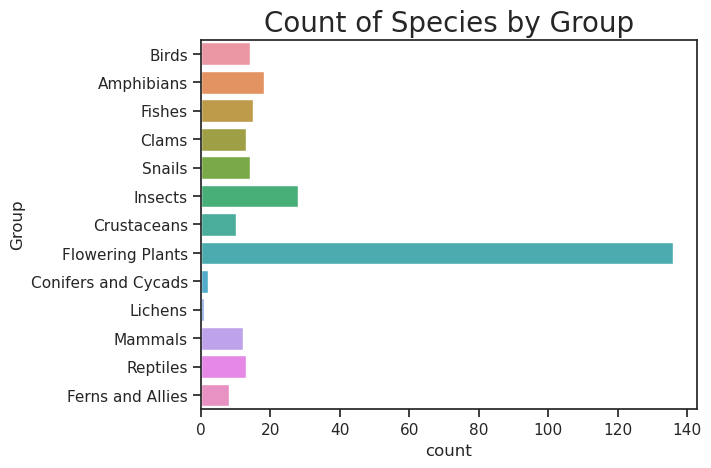

<Figure size 3000x600 with 0 Axes>

In [70]:
sns.countplot(df_joined,y="Group")
plt.title('Count of Species by Group', fontsize=20)
plt.figure(figsize=(30, 6))

## Endangered Counts

In [71]:
endangered_df = df_joined[df_joined['Current ESA Listing Status'].str.contains('Endangered')]
endangered_df

,Lead Agency,Scientific Name,Common Name,Current ESA Listing Status,Initial Listing Date,Group,Year
2,FWS,Tympanuchus pallidicinctus,"Prairie-chicken, lesser (Southern DPS)",Endangered,2023-03-27,Birds,2023
4,FWS,Rana boylii,"Frog, foothill yellow-legged (South Coast Dist...",Endangered,2023-09-28,Amphibians,2023
5,FWS,Rana boylii,"Frog, foothill yellow-legged (South Sierra Dis...",Endangered,2023-09-28,Amphibians,2023
12,FWS,Planorbella magnifica,"Ramshorn, magnificent (Wherever found)",Endangered,2023-09-18,Snails,2023
14,FWS,Euphydryas anicia cloudcrofti,"Butterfly, Sacramento Mountains checkerspot (W...",Endangered,2023-03-02,Insects,2023
...,...,...,...,...,...,...,...
279,FWS,Schiedea salicaria,No common name,Endangered,2013-06-27,Flowering Plants,2013
280,FWS,Sphaeralcea gierischii,"mallow, Gierisch",Endangered,2013-09-12,Flowering Plants,2013
281,FWS,Stenogyne cranwelliae,No common name,Endangered,2013-11-29,Flowering Plants,2013
282,FWS,Stenogyne kauaulaensis,No common name (),Endangered,2013-06-27,Flowering Plants,2013


<div class="alert alert-block alert-success">
This is a table containing only species with the ESA listing status "Endangered"
</div>

Text(0.5, 1.0, 'Endangered species count')

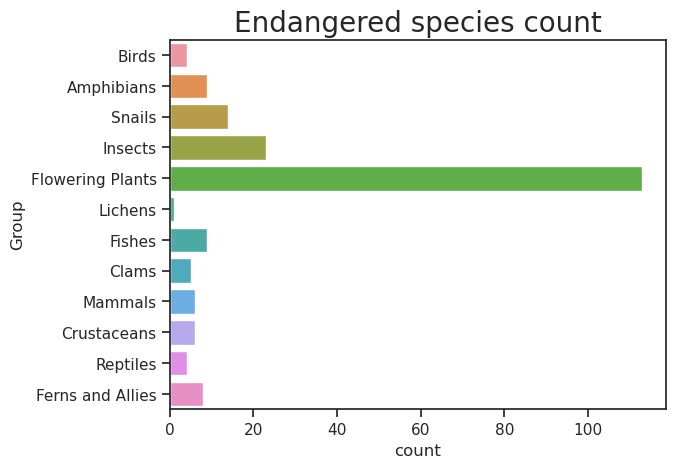

In [72]:
sns.countplot(endangered_df,y='Group')
plt.title('Endangered species count', fontsize=20)

<div class="alert alert-block alert-info">
<b>Observation:</b><br>
Flowering Plants are still the most counted species 
</div>

## Threatened Counts

In [73]:
threatened_df = df_joined[df_joined['Current ESA Listing Status'].str.contains('Threatened')]
threatened_df

,Lead Agency,Scientific Name,Common Name,Current ESA Listing Status,Initial Listing Date,Group,Year
0,FWS,Glaucidium brasilianum cactorum,"Pygmy-owl, cactus ferruginous (Wherever found)",Threatened,2023-08-21,Birds,2023
1,FWS,Tympanuchus pallidicinctus,"Prairie-chicken, lesser (Northern DPS)",Threatened,2023-03-27,Birds,2023
3,FWS,Rana boylii,"Frog, foothill yellow-legged (Central Coast Di...",Threatened,2023-09-28,Amphibians,2023
6,FWS,Rana boylii,"Frog, foothill yellow-legged (North Feather Di...",Threatened,2023-09-28,Amphibians,2023
7,FWS,Noturus munitus,"Madtom, frecklebelly (Upper Coosa River DPS)",Threatened,2023-04-03,Fishes,2023
...,...,...,...,...,...,...,...
208,FWS,Elassoma alabamae,"Sunfish, spring pygmy ()",Threatened,2013-12-02,Fishes,2013
212,FWS,Quadrula cylindrica cylindrica,Rabbitsfoot (),Threatened,2013-10-17,Clams,2013
254,FWS,Eriogonum codium,"Buckwheat, Umtanum Desert ()",Threatened,2013-05-23,Flowering Plants,2013
259,FWS,Hibiscus dasycalyx,"Rose-mallow, Neches River",Threatened,2013-10-11,Flowering Plants,2013


<div class="alert alert-block alert-success">
This is a table containing only species with the ESA listing status "Threatened"
</div>

Text(0.5, 1.0, 'Threatened Species Count')

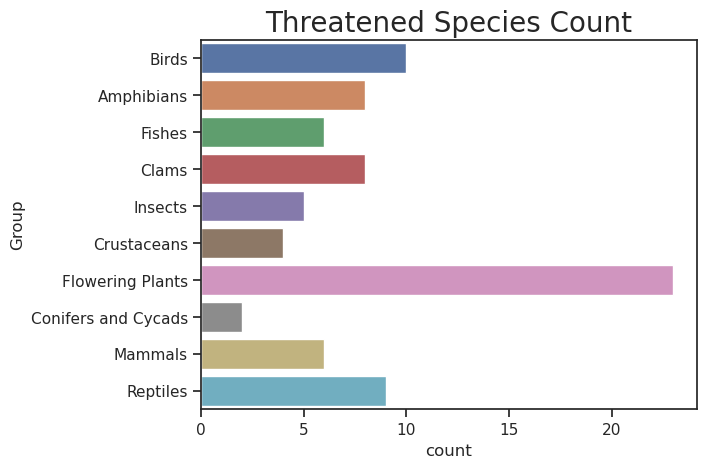

In [74]:
sns.countplot(threatened_df,y='Group')
plt.title('Threatened Species Count', fontsize=20)

<div class="alert alert-block alert-info">
<b>Observation:</b><br>
Flowering Plants are still the most counted species 
</div>

## Most re-occuring endangered/threatened species

In [75]:
endangered_df['Scientific Name'].value_counts() #how many of the same species are listed

Scientific Name
Rana boylii                                                      2
Chelonia mydas                                                   2
Tryonia cheatumi                                                 1
Crystallaria cincotta                                            1
Lampsilis rafinesqueana                                          1
                                                                ..
Portulaca villosa                                                1
Pritchardia bakeri                                               1
Pseudognaphalium (=Gnaphalium) sandwicensium var. molokaiense    1
Ranunculus hawaiensis                                            1
Wikstroemia villosa                                              1
Name: count, Length: 200, dtype: int64

In [76]:
most_endangered_df = endangered_df[endangered_df['Scientific Name'].isin(['Rana boylii', 'Chelonia mydas'])]
most_endangered_df

,Lead Agency,Scientific Name,Common Name,Current ESA Listing Status,Initial Listing Date,Group,Year
4,FWS,Rana boylii,"Frog, foothill yellow-legged (South Coast Dist...",Endangered,2023-09-28,Amphibians,2023
5,FWS,Rana boylii,"Frog, foothill yellow-legged (South Sierra Dis...",Endangered,2023-09-28,Amphibians,2023
71,FWS/NMFS,Chelonia mydas,"Sea turtle, green (Central South Pacific DPS)",Endangered,2016-05-06,Reptiles,2016
72,FWS/NMFS,Chelonia mydas,"Sea turtle, green (Central West Pacific DPS)",Endangered,2016-05-06,Reptiles,2016


In [77]:
threatened_df['Scientific Name'].value_counts()

Scientific Name
Chelonia mydas                             4
Tympanuchus pallidicinctus                 2
Rana boylii                                2
Nervilia jacksoniae                        1
Thomomys mazama yelmensis                  1
                                          ..
Zapada glacier                             1
Lednia tumana                              1
Etheostoma trisella                        1
Laterallus jamaicensis ssp. jamaicensis    1
Physaria douglasii ssp. tuplashensis       1
Name: count, Length: 76, dtype: int64

In [78]:
most_threatened_df = endangered_df[endangered_df['Scientific Name'].str.contains('Chelonia mydas')]
most_threatened_df

,Lead Agency,Scientific Name,Common Name,Current ESA Listing Status,Initial Listing Date,Group,Year
71,FWS/NMFS,Chelonia mydas,"Sea turtle, green (Central South Pacific DPS)",Endangered,2016-05-06,Reptiles,2016
72,FWS/NMFS,Chelonia mydas,"Sea turtle, green (Central West Pacific DPS)",Endangered,2016-05-06,Reptiles,2016


<div class="alert alert-block alert-info">
<b>Observation:</b><br>
- The species that is listed the most is <strong>Flowering Plants</strong>.<br>
- The species that is listed the least is <strong>Lichens</strong> (fungi and algae).<br>
- The Chelonia mydas was listed as threatened 4 times <br>
- The Rana boylii was listed as endangered 2 times <br><br>
We can see in the graph that Flowering Plants are the most commonly named species throughout the decade.
    so,
<strong>The most endangered species/threatend species are flowering plants<strong>
</div>

# RELATIONSHIPS

## 1. Scientific Name vs LISTING STATUS by Group

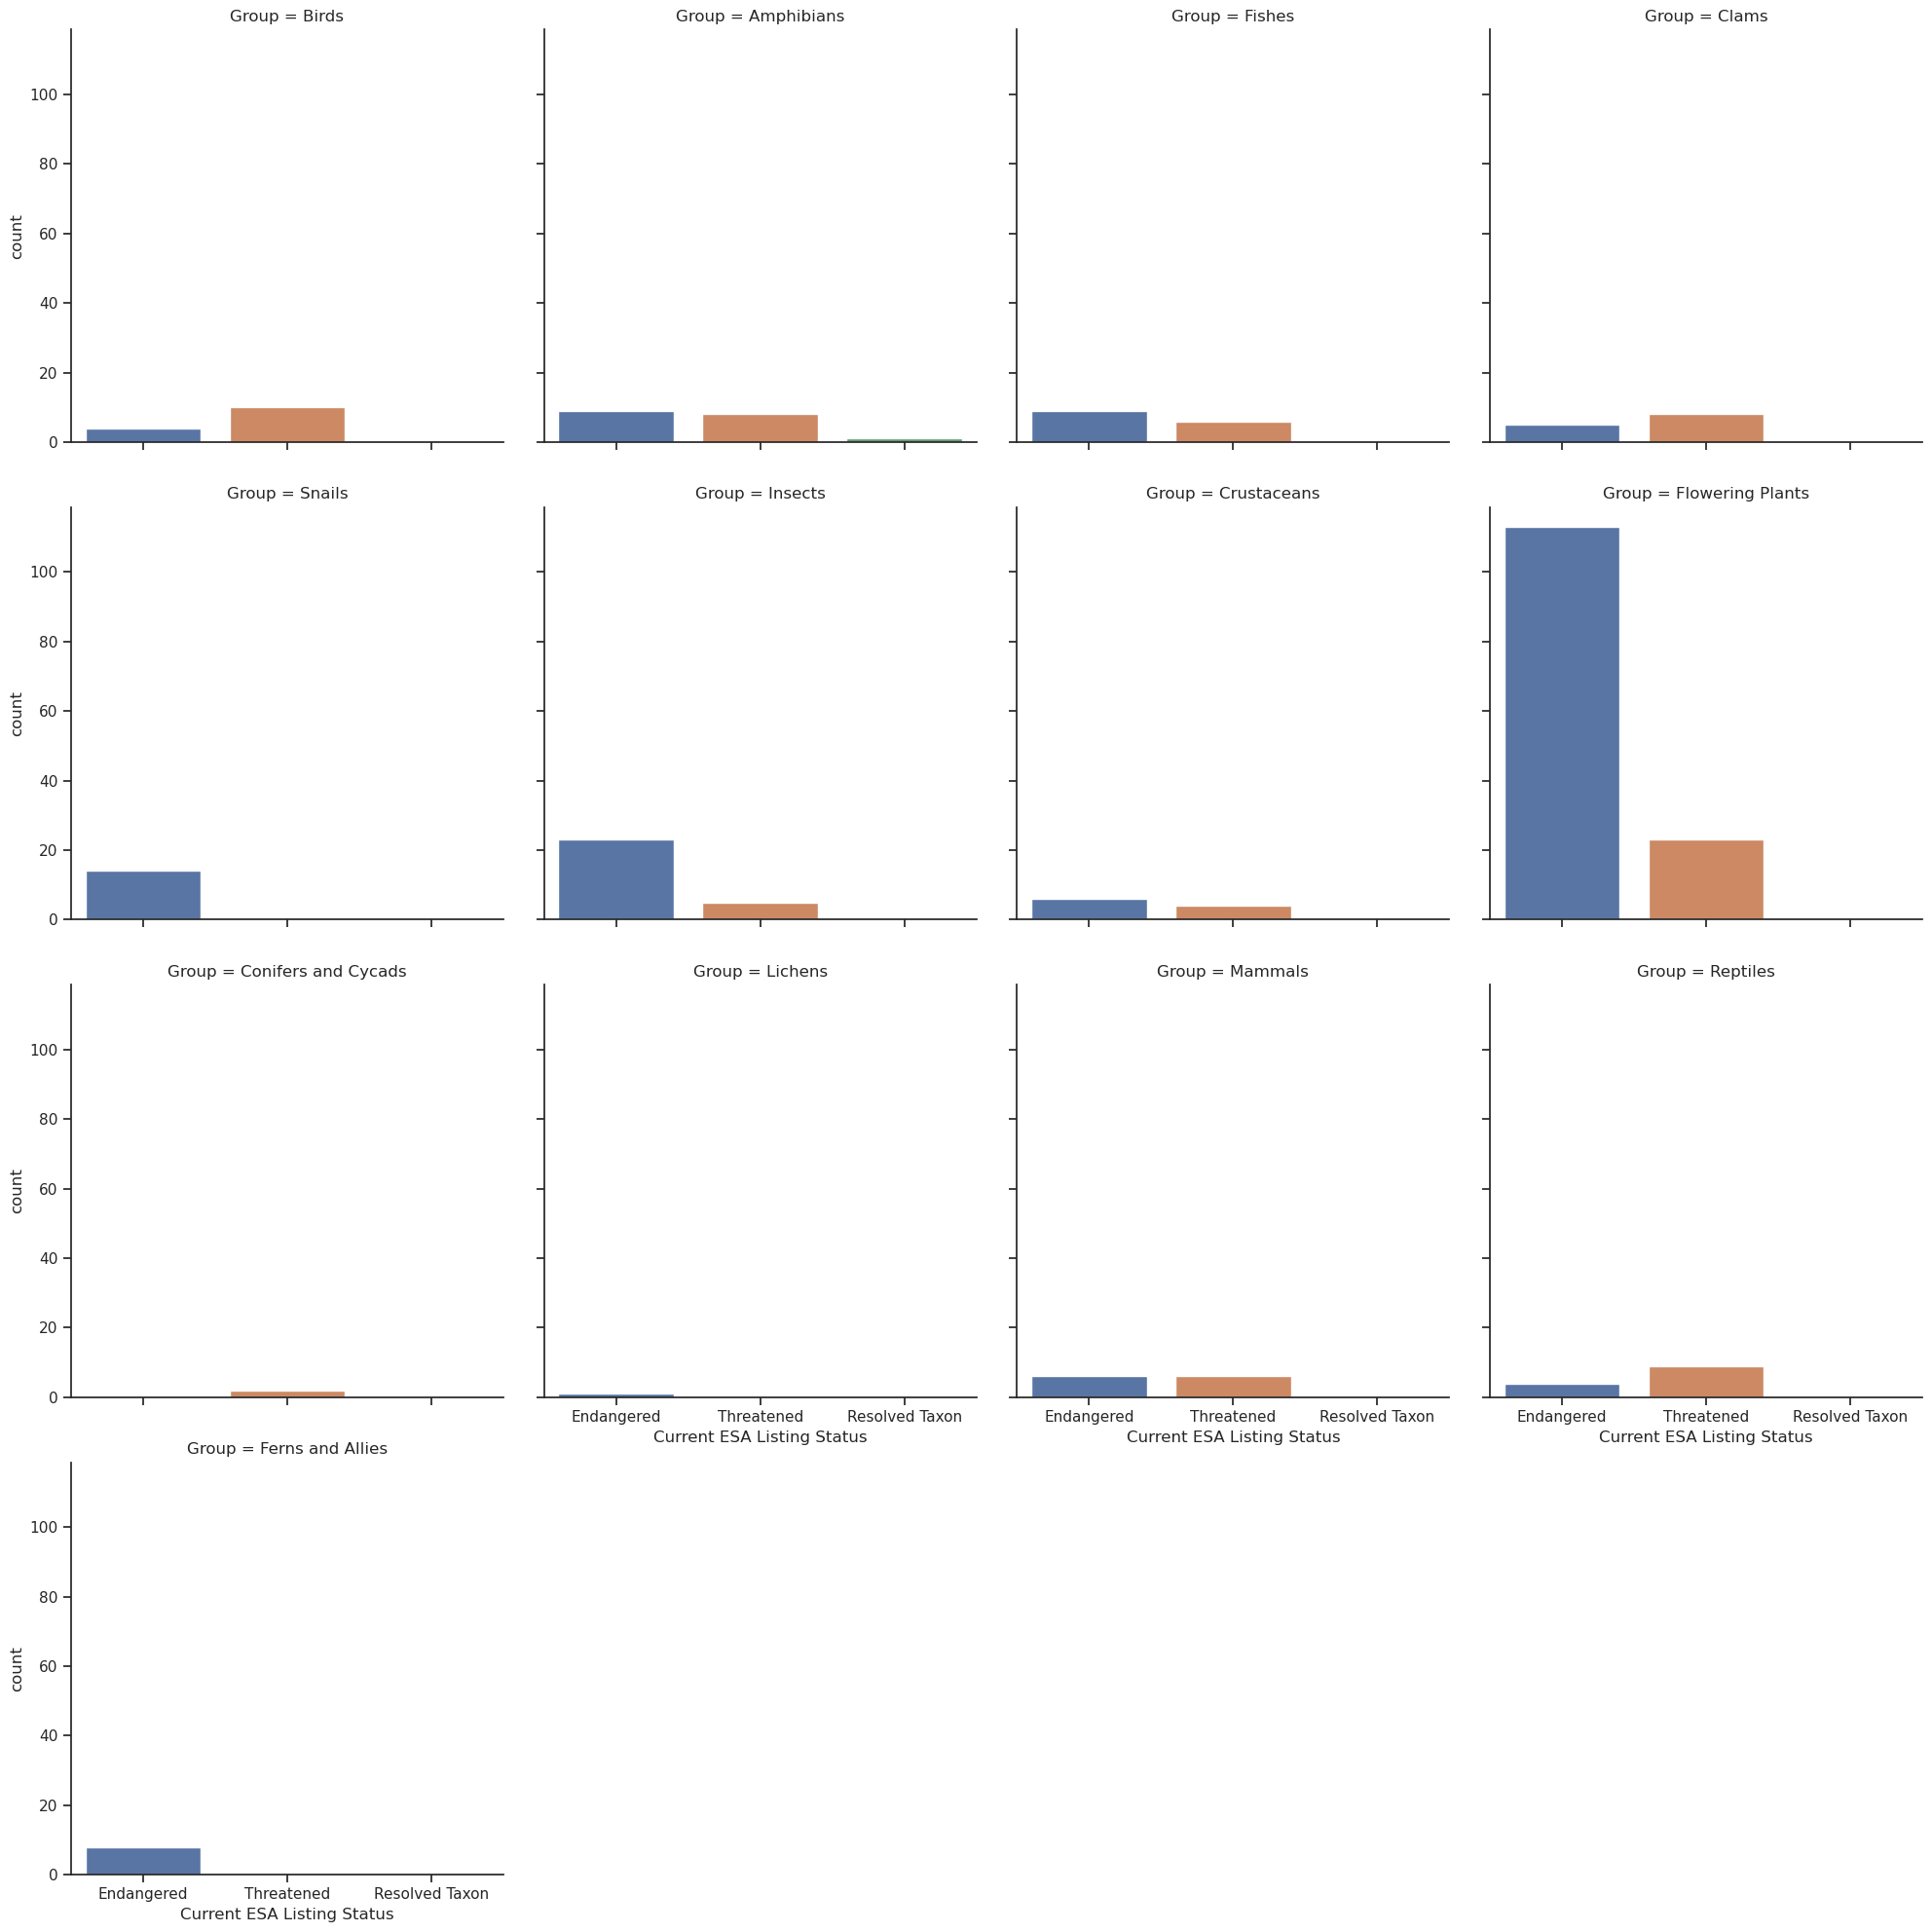

In [79]:
sns.set_theme(style="ticks") #Grids

g = sns.catplot( #Graphing Listing Status Count VS Group
    data=df_joined,
    x="Current ESA Listing Status", # Threatend, Endangered, Resolved Taxon
    col="Group", # Facets by group
    kind="count", # makes the graph a countplot type
    order=df_joined['Current ESA Listing Status'].value_counts().index, # Organize by index
    col_wrap=4 #put the graphs in rows for better visualization
)

g.fig.tight_layout(w_pad=2) # fixes layout
plt.show()


<div class="alert alert-block alert-info">
<b>Observation:</b> From the graphs I can see that the most likely species at risk is Flowering Plants, Insects, and snails. The overall trend in the graph is that there are more endangered species than threatend species.
</div>

In [80]:
list(set(df_joined['Current ESA Listing Status']))

['Threatened', 'Endangered', 'Resolved Taxon']

<div class="alert alert-block alert-success">
<b>Description:</b><br>
- <strong>Threatened</strong> = species that are close to extinction<br>
- <strong>Endangered</strong> = species that are close to being threatened<br>
- <strong>Resolved Taxon</strong> = not endangered or threatened (sustained)
</div>

## 2. ESA LISTING STATUS COUNT

<Axes: xlabel='Year', ylabel='count'>

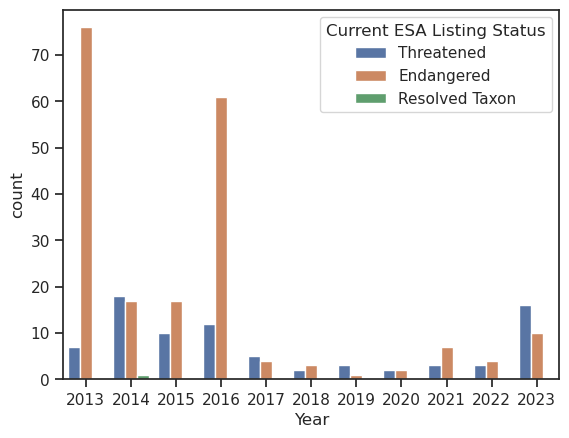

In [81]:
sns.countplot(data=df_joined, x="Year", hue="Current ESA Listing Status")


<div class="alert alert-block alert-info">
<b>Observation:</b> Looking at the graph we can see that in the years 2013 and 2016 had the most endangered species while 2023 had the most threatend. There was only one year that had a resolved taxon which means that resolved taxon is a status that is hard to get for a species.
</div>

## 3. Number of species timeline by group.

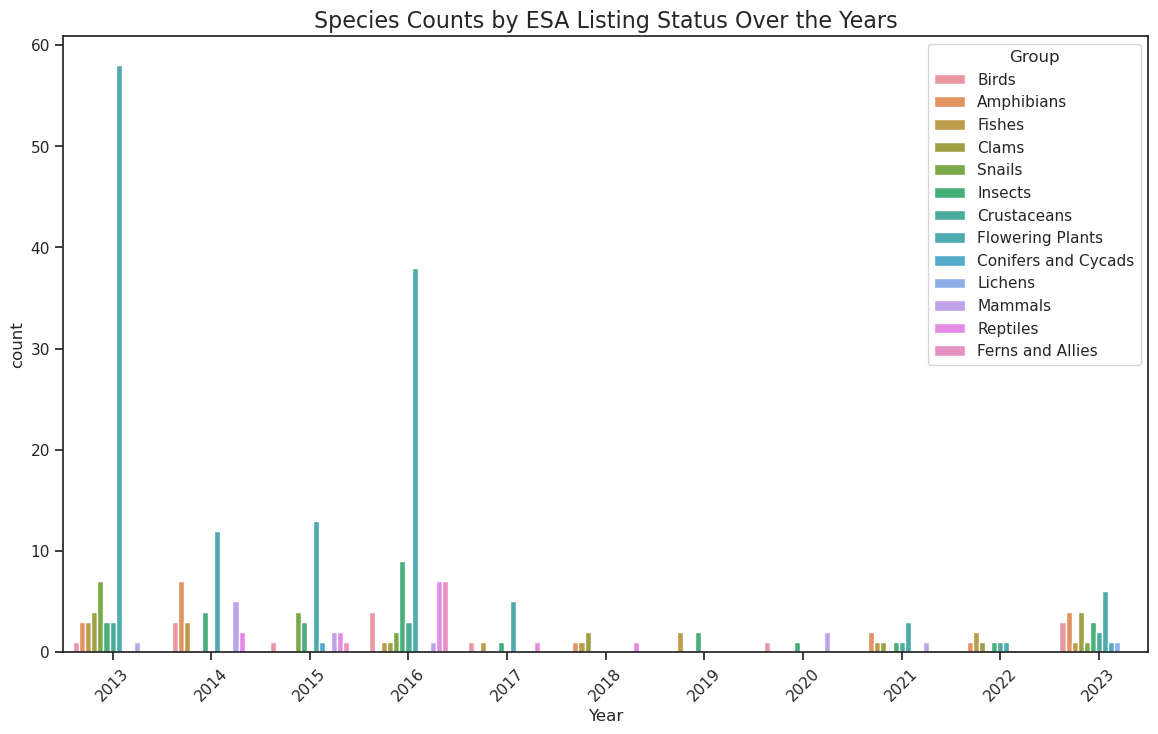

In [82]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_joined, x="Year", hue="Group")
plt.title('Species Counts by ESA Listing Status Over the Years', fontsize=16) #title
plt.xticks(rotation=45) # rotate x titles
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> The number of species recorded tends to decline for each species after 2016. The latest year that the msot data was collected was 2023. This means that something had to happen in between that time period.
    
</div>

In [83]:
resolved_taxon_species = df_joined[df_joined['Current ESA Listing Status'] == 'Resolved Taxon'] #Find resolved Taxon.
resolved_taxon_species

,Lead Agency,Scientific Name,Common Name,Current ESA Listing Status,Initial Listing Date,Group,Year
179,FWS,Rana muscosa,"Frog, mountain yellow-legged (Sierra Nevada)",Resolved Taxon,2014-06-30,Amphibians,2014


<div class="alert alert-block alert-info">
<b>Observation:</b> The Rana muscosa was labeled as <strong>resolved taxon</strong> in 2014 but in the 2025 it is listed as endangered so that means the species became endangered or threatend in 2014.
</div>

# Final Observations


<div class="alert alert-block alert-warning">
From the data a conclusion that can be made is that small plants and animals like insects, flowering plants, and snails are at the most risk according to the high number of species listed for each species. We can also see that most of the species listed are either threatend or endangered with most being endangered. <br><br>
  
    
What have we unconvered?
-  A species can be labeled as endangered, threatened, or resolved taxon. Some species may be listed more than once if they are found in different regions. <br>
- There are more endangered species than threatend <br>
- The most data recorded were in the years 2013-2016 <br>
- There was one species with the resolved taxon listing status. (changed to endangered recently) <br>
- Flowering Plants are the most recorded species in the dataset <br>
    
</div>